In [1]:
from sagas.bots.hanlp_procs import hanlp
raw='我是中学生'
sentence = hanlp.j.HanLP.parseDependency(raw)
wordArray = sentence.getWordArray()
for word in wordArray:
    print("%s --(%s)--> %s" % (word.LEMMA, word.DEPREL, word.HEAD.LEMMA))

我 --(主谓关系)--> 是
是 --(核心关系)--> ##核心##
中学生 --(动宾关系)--> 是


我 --(主谓关系)--> 是
是 --(核心关系)--> ##核心##
中学生 --(动宾关系)--> 是


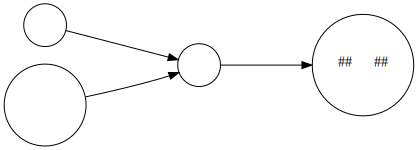

In [8]:
class HanlpViz(object):
    def __init__(self):
        from graphviz import Digraph
        self.f = Digraph('deps', filename='deps.gv')
        self.f.attr(rankdir='LR', size='8,5')
        self.f.attr('node', shape='circle')

    def print_dependencies(self, doc, segs, file=None):
        for word in doc.getWordArray():
            print("%s --(%s)--> %s" % (word.LEMMA, word.DEPREL, word.HEAD.LEMMA))            
            self.f.edge(word.LEMMA, word.HEAD.LEMMA, label=word.DEPREL)

    def analyse(self, sents):
        segs = []
        doc = hanlp.j.HanLP.parseDependency(sents)     
        words = doc.getWordArray()
        for word in words:
            self.f.node(word.LEMMA)
            segs.append(word.LEMMA)
        self.print_dependencies(doc, segs)
        return self.f

HanlpViz().analyse('我是中学生')

我 --(主谓关系)--> 找
要 --(状中结构)--> 找
找 --(核心关系)--> ##核心##
一 --(定中关系)--> 本
本 --(定中关系)--> 英语书
英语书 --(动宾关系)--> 找


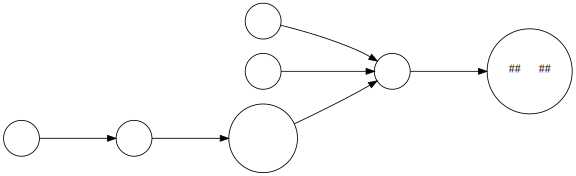

In [9]:
HanlpViz().analyse('我要找一本英语书')